# <font color = 'black'> Análise exploratória de dados de assiduidade em consultas na cidade de Vitória - ES. </font> 


#   <font color = 'blue'> Grupo 1: </font> 
* Aline Carvalho
* Camila Bianca
* Felipe Cunha
* Ivan Felipe 
* Mateus Brito
* Vinícius Peixoto

# <font color = 'blue'> Dicionário de Dados: </font> 

## Este conjunto de dados contém informações sobre as consultas médicas marcadas em clínicas no Brasil e se os pacientes compareceram ou não às consultas.

### O conjunto de dados inclui as seguintes colunas:

* PatientId: identificador único do paciente
* AppointmentID: identificador único da consulta
* Gender: gênero do paciente (Feminino/Masculino)
* ScheduledDay: data em que a consulta foi marcada
* AppointmentDay: data da consulta
* Age: idade do paciente
* Neighbourhood: nome do bairro onde a consulta ocorrerá
* Scholarship: indica se o paciente faz parte do programa Bolsa Família (0 = não, 1 = sim)
* Hipertension: indica se o paciente tem hipertensão (0 = não, 1 = sim)
* Diabetes: indica se o paciente tem diabetes (0 = não, 1 = sim)
* Alcoholism: indica se o paciente tem problemas com álcool (0 = não, 1 = sim)
* Handcap: indica se o paciente é deficiente (0 = não, 1 = sim)
* SMS_received: indica se o paciente recebeu uma mensagem de lembrete da consulta (0 = não, 1 = sim)
* No-show: indica se o paciente compareceu à consulta (No = sim, Yes = não)

##  <font color = 'blue'>Perguntas a serem respondidas:  </font>
### Ação combativa
- Qual o impacto do recebimento do SMS em cada grupo?
  - Geral 
  - Problemas de saúde
  - Idade
  - PCD

### Ação paliativa
- Qual a faixa etária mais assídua e a mais ausente? 
- Qual(is) o(s) bairro(s) de pessoas menos assíduas? 
- Quais os problemas de saúde das pessoas menos assíduas? 
- intervalo de tempo entre o dia da marcação e o dia da consulta em si.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm

tqdm.pandas(desc='progress')
warnings.filterwarnings("ignore")


In [2]:
# fonte: https://www.kaggle.com/datasets/sarvaninandipati/brazils-medical-appointment-show-or-no-show
df = pd.read_excel('appointment_prediction_data.xlsx')

# fonte: Vitória (Censo e UDH) - Atlas do Desenvolvimento Humano no Brasil - Ipea (https://dados.gov.br/dados/conjuntos-dados/atlasbrasil)
aux = pd.read_csv('RM_63200_Vitória_Base_UDH_2000_2010.csv')

In [3]:
def uppercase(x):
    return str(x).upper()

# usado somente nome dos bairros e a renda per capta deles
aux['NOME_UDH'] = aux['NOME_UDH'].progress_apply(lambda x: uppercase(x))
dados_renda_per_capta = aux[['NOME_UDH', 'RDPC']]
dados_renda_per_capta = dados_renda_per_capta.groupby('NOME_UDH').mean().reset_index()

# fonte: Plano Municipal de Saúde 2022-2025 Vitória - 2022 (https://m.vitoria.es.gov.br/download.php?tipo=1&id=3521)
regioes_saude = {
    'CONTINENTAL': ['AEROPORTO','ANTÔNIO HONÓRIO','BOA VISTA','JABOUR','JARDIM CAMBURI',
                    'JARDIM DA PENHA','MARIA ORTIZ','MATA DA PRAIA','MORADA DE CAMBURI',
                    'PONTAL DE CAMBURI','REPÚBLICA','SEGURANÇA DO LAR','SOLON BORGES',
                    'GOIABEIRAS', 'PARQUE INDUSTRIAL'],
    'CENTRO': ['CENTRO','DO CABRAL','DO MOSCOSO','DO QUADRO','FONTE GRANDE',
                     'ILHA DO PRÍNCIPE','PARQUE MOSCOSO','PIEDADE','SANTA CLARA',
                     'SANTA TEREZA','VILA RUBIM'],
    'SANTO ANTÔNIO': ['ARIOVALDO FAVALESSA','BELA VISTA','CARATOÍRA','ESTRELINHA',
                      'GRANDE VITÓRIA','INHANGUETÁ','MÁRIO CYPRESTE','SANTO ANTÔNIO',
                      'UNIVERSITÁRIO'],
    'MARUÍPE': ['ANDORINHAS','BONFIM','CONSOLAÇÃO','DA PENHA','DE LOURDES','GURIGICA',
                'HORTO','ITARARÉ','JOANA D\'ARC','MARUÍPE','SANTA CECÍLIA','SANTA MARTHA',
                'SANTOS DUMONT','SÃO BENEDITO','SÃO CRISTÓVÃO','TABUAZEIRO'],
    'SÃO PEDRO': ['COMDUSA','CONQUISTA','ILHA DAS CAIEIRAS','NOVA PALESTINA','REDENÇÃO',
                  'RESISTÊNCIA','SANTO ANDRÉ','SANTOS REIS','SÃO JOSÉ','SÃO PEDRO'],
    'FORTE SÃO JOÃO': ['BARRO VERMELHO','BENTO FERREIRA','CRUZAMENTO','ENSEADA DO SUÁ',
                       'FORTE SÃO JOÃO','FRADINHOS','MONTE BELO','ILHA DE SANTA MARIA',
                       'ILHA DO BOI','ILHA DO FRADE','JESUS DE NAZARETH','JUCUTUQUARA',
                       'NAZARETH','PRAIA DO CANTO','PRAIA DO SUÁ','ROMÃO','SANTA HELENA',
                       'SANTA LÚCIA','SANTA LUÍZA', 'ILHAS OCEÂNICAS DE TRINDADE']
}

# funções auxiliares
def regiao_saude(bairro):
    for regiao, bairros in regioes_saude.items():
        if bairro in bairros:
            return regiao

def get_renda(bairro):
    renda = []
    for idx, row in dados_renda_per_capta.iterrows():
        if bairro in row['NOME_UDH']:
            renda.append(row['RDPC'])
    if not renda:
        return 0
    return sum(renda)/len(renda)

progress: 100%|██████████| 124/124 [00:00<00:00, 123979.43it/s]


In [4]:
# remover linhas duplicadas
df.drop_duplicates(subset='AppointmentID', keep='first')

# alterar coluna "No-show" para algo mais intuitivo
df['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)
df.rename(columns={'No-show': 'Compareceu'}, inplace=True)

# corrigir gêneros
df['Gender'].replace({'Female':'F','Male':'M'}, inplace=True)

# corrigir bairros
df['Neighbourhood'].replace({'RESIST√äNCIA':'RESISTÊNCIA','REP√öBLICA':'REPÚBLICA','S√ÉO PEDRO':'SÃO PEDRO',
                             'S√ÉO CRIST√ìV√ÉO':'SÃO CRISTÓVÃO','MARU√çPE':'MARUÍPE','GRANDE VIT√ìRIA':'GRANDE VITÓRIA',
                             'S√ÉO BENEDITO':'SÃO BENEDITO','SANTO ANDR√â':'SANTO ANDRÉ','ANT√îNIO HON√ìRIO':'ANTÔNIO HONÓRIO',
                             'M√ÅRIO CYPRESTE':'MÁRIO CYPRESTE','SANTO ANT√îNIO':'SANTO ANTÔNIO','PRAIA DO SU√Å':'PRAIA DO SUÁ',
                             'ITARAR√â':'ITARARÉ','INHANGUET√Å':'INHANGUETÁ','UNIVERSIT√ÅRIO':'UNIVERSITÁRIO',
                             'S√ÉO JOS√â':'SÃO JOSÉ','REDEN√á√ÉO':'REDENÇÃO','CARATO√çRA':'CARATOÍRA',
                             'ILHA DO PR√çNCIPE': 'ILHA DO PRÍNCIPE','ROM√ÉO': 'ROMÃO', 'FORTE S√ÉO JO√ÉO': 'FORTE SÃO JOÃO',
                             'JOANA D¬¥ARC': 'JOANA D\'ARC','CONSOLA√á√ÉO': 'CONSOLAÇÃO', 'SANTA CEC√çLIA': 'SANTA CECÍLIA',
                             'SANTA L√öCIA': 'SANTA LÚCIA','SANTA LU√çZA': 'SANTA LUÍZA', 'SEGURAN√áA DO LAR': 'SEGURANÇA DO LAR',
                             'Tabuazerio': 'TABUAZEIRO','ILHAS OCE√ÇNICAS DE TRINDADE': 'ILHAS OCEÂNICAS DE TRINDADE',
                             'ENSEADA DO SU√Å': 'ENSEADA DO SUÁ', 'DE LOURDE': 'DE LOURDES'}, inplace=True)
df['Neighbourhood'] = df.Neighbourhood.str.upper()

# adicionar macro-regiões de saúde
df['Regiao_Saude'] = df['Neighbourhood'].progress_apply(lambda x: regiao_saude(x))

# dias da semana
df['AppointmentDayOfWeek'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()
df['ScheduledDayOfWeek'] = pd.to_datetime(df['ScheduledDay']).dt.day_name()

# adicionar tempo entre 'dia que marcou a consulta' e 'dia da consulta'
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['time_delta'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# adicionar renda média por bairro
df['Renda'] = df['Neighbourhood'].progress_apply(lambda x: get_renda(x))



progress: 100%|██████████| 110573/110573 [02:12<00:00, 832.56it/s]


# Percentual de comparecimento 

In [5]:
foram_percent = df['Compareceu'].mean()
faltaram_percent = (100 - foram_percent)  

print(f'A assiduidade nas consultas foi de {foram_percent:.2f}%. Ausência de {faltaram_percent:.2f}%. ')

A assiduidade nas consultas foi de 0.80%. Ausência de 99.20%. 


### Percentual de comparecimento após o dia 0

In [6]:
# criando dataframe com os dias maiores que zero
df_sem_dia0 = df[df['time_delta'] > 0] 
presenca_sem_dia0 = len(df_sem_dia0[df_sem_dia0['Compareceu']==1])
# Verificando quantas consultas foram marcadas para o mesmo dia e criando um dataframe com essas consultas
consultas_mais_1dia=len(df_sem_dia0)
total_consultas=len(df['time_delta'])

print(f'Total de consultas marcadas com um ou mais de um dia de intervalo: {consultas_mais_1dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram, com exceção do dia 0, à consulta (1 - Sim, 0 - Não):')
print(df_sem_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')
print(f'Percentual de consultas marcadas para um intervalo de tempo maior que um dia: {consultas_mais_1dia/total_consultas*100:.2f}%.')
print(f'\n{presenca_sem_dia0} presenças')
print(f'Percentual de presença nessas consultas: {presenca_sem_dia0/len(df_sem_dia0)*100:.2f}%.')


Total de consultas marcadas com um ou mais de um dia de intervalo: 71981.
Total de consultas: 110573.

Relação das pessoas que compareceram, com exceção do dia 0, à consulta (1 - Sim, 0 - Não):
1    51454
0    20527
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 71981, Colunas: 19
Percentual de consultas marcadas para um intervalo de tempo maior que um dia: 65.10%.

51454 presenças
Percentual de presença nessas consultas: 71.48%.


### percentual de ausencia pelo sexo biológico, coluna 'Gender'


In [7]:
df.groupby('Gender')['Compareceu'].mean()

Gender
F    0.796883
M    0.800377
Name: Compareceu, dtype: float64

### percentual de ausencia entre os benificiários do bolsa família


In [8]:
# percentual de ausencia entre os benificiários do bolsa família
df.groupby('Scholarship')['Compareceu'].mean()

Scholarship
0    0.801970
1    0.762637
Name: Compareceu, dtype: float64

### percentual de ausência entre o grupo PCD


In [9]:
df['Handcap'].replace(to_replace = (2 ,3 ,4), value = 1 , inplace = True)
#df['Handcap'].value_counts()

df.groupby('Handcap')['Compareceu'].mean() # bronze

Handcap
0    0.797685
1    0.818466
Name: Compareceu, dtype: float64

### percentual de ausência entre os pacientes com problemas com álcool


In [10]:
# percentual de ausência entre os alcoólótras
df.groupby('Alcoholism')['Compareceu'].mean()

Alcoholism
0    0.798094
1    0.798512
Name: Compareceu, dtype: float64

### percentual de ausência entre os diabéticos


In [11]:
# percentual de ausência entre os diabéticos
df.groupby('Diabetes')['Compareceu'].mean() # medalha de prata em assiduidade

Diabetes
0    0.796408
1    0.820035
Name: Compareceu, dtype: float64

### percentual de ausência entre os hipertensos


In [12]:
# percentual de ausência entre os hipertensos
df.groupby('Hipertension')['Compareceu'].mean() # campeões em assiduidade

Hipertension
0    0.791014
1    0.826968
Name: Compareceu, dtype: float64

### Percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS


In [13]:
# percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS
df.groupby('SMS_received')['Compareceu'].mean()

# percebe-se que quem recebe sms tende a faltar mais do que o grupo q não recebeu

SMS_received
0    0.833016
1    0.724282
Name: Compareceu, dtype: float64

## Faixa etária


In [14]:
#criar uma coluna de faixa etária
df['Faixa etaria']=pd.cut(df['Age'], bins=[-1,12,18,30,60,125], labels=['Crianças','Adolescentes','Adultons Jovens','Adultos','Idosos'])


In [15]:
# verifica criação de nova coluna faixa etária
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,Regiao_Saude,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Renda,Faixa etaria
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,CONTINENTAL,Friday,Friday,0,2608.4825,Idosos
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,CONTINENTAL,Friday,Friday,0,2608.4825,Adultos
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,CONTINENTAL,Friday,Friday,0,3886.9200,Idosos
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,CONTINENTAL,Friday,Friday,0,1708.1500,Crianças
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,CONTINENTAL,Friday,Friday,0,2608.4825,Adultos
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,1,CONTINENTAL,Friday,Wednesday,2,1631.0050,Idosos
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,0,CONTINENTAL,Friday,Wednesday,2,791.3625,Adultons Jovens
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,0,CONTINENTAL,Friday,Wednesday,2,791.3625,Adultos
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21.0,ANDORINHAS,0,0,0,0,0,0,1,MARUÍPE,Friday,Friday,0,603.6125,Adultons Jovens
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.0,CONQUISTA,0,0,0,0,0,0,1,SÃO PEDRO,Friday,Wednesday,2,355.0450,Adultons Jovens


 ### Qual a faixa etária mais assídua e a mais ausente? 

In [16]:
# agrupa em ordem decrescente a assiduidade por faixa etária
df.groupby('Faixa etaria')['Compareceu'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.847825
Adultos            0.804531
Crianças           0.795307
Adultons Jovens    0.752940
Adolescentes       0.739336
Name: Compareceu, dtype: float64

### qual faixa etária é mais acometida com problemas com álcool? 


In [17]:
df.groupby('Faixa etaria')['Alcoholism'].mean().sort_values(ascending=False)

Faixa etaria
Adultos            0.052093
Idosos             0.037221
Adultons Jovens    0.014747
Adolescentes       0.001916
Crianças           0.000619
Name: Alcoholism, dtype: float64

### qual faixa etária é mais acometida pelo diabetes? 


In [18]:
df.groupby('Faixa etaria')['Diabetes'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.221806
Adultos            0.075080
Adultons Jovens    0.006985
Adolescentes       0.004087
Crianças           0.000904
Name: Diabetes, dtype: float64

### qual faixa etária é mais acometida pelo hipertensão? 

In [19]:
df.groupby('Faixa etaria')['Hipertension'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.556743
Adultos            0.231158
Adultons Jovens    0.019285
Adolescentes       0.003704
Crianças           0.000571
Name: Hipertension, dtype: float64

# Bairros: 

### Qual(ais) bairros mais assíduos ? 

In [20]:
df.groupby('Neighbourhood')['Compareceu'].mean().sort_values(ascending=False)
# Os últimos são os bairros de pacientes com maior ausência em consultas

Neighbourhood
PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MÁRIO CYPRESTE                 0.854447
SOLON BORGES                   0.853191
                                 ...   
ITARARÉ                        0.737336
SANTA CLARA                    0.735178
SANTA CECÍLIA                  0.725446
SANTOS DUMONT                  0.710815
ILHAS OCEÂNICAS DE TRINDADE    0.000000
Name: Compareceu, Length: 81, dtype: float64

###  Qual(is) bairro(s) detém maior número de beneficiários do programa Bolsa família?


In [21]:
df.groupby('Neighbourhood')['Scholarship'].mean().sort_values(ascending=False)


Neighbourhood
SÃO BENEDITO                   0.280751
DO MOSCOSO                     0.268765
ILHA DO PRÍNCIPE               0.255516
PIEDADE                        0.254425
SANTOS REIS                    0.219378
                                 ...   
ILHAS OCEÂNICAS DE TRINDADE    0.000000
BARRO VERMELHO                 0.000000
PARQUE INDUSTRIAL              0.000000
MORADA DE CAMBURI              0.000000
AEROPORTO                      0.000000
Name: Scholarship, Length: 81, dtype: float64

### Qual(is) bairro(s) detém maior número de pacientes com problemas com álcool? 

In [22]:
df.groupby('Neighbourhood')['Alcoholism'].mean().sort_values(ascending=False)


Neighbourhood
ESTRELINHA                     0.146840
DO MOSCOSO                     0.130751
SANTA MARTHA                   0.109869
PRAIA DO SUÁ                   0.079193
DA PENHA                       0.077582
                                 ...   
ILHAS OCEÂNICAS DE TRINDADE    0.000000
PARQUE INDUSTRIAL              0.000000
MORADA DE CAMBURI              0.000000
MONTE BELO                     0.000000
AEROPORTO                      0.000000
Name: Alcoholism, Length: 81, dtype: float64

### Qual(is) bairro(s) detém maior número de hipertensos? 

In [23]:
df.groupby('Neighbourhood')['Hipertension'].mean().sort_values(ascending=False)


Neighbourhood
DE LOURDES                     0.347541
SANTA CECÍLIA                  0.323661
PARQUE MOSCOSO                 0.320449
FONTE GRANDE                   0.312317
SANTOS DUMONT                  0.311129
                                 ...   
ANTÔNIO HONÓRIO                0.018450
NAZARETH                       0.007407
ILHAS OCEÂNICAS DE TRINDADE    0.000000
ILHA DO FRADE                  0.000000
PARQUE INDUSTRIAL              0.000000
Name: Hipertension, Length: 81, dtype: float64

### Qual(is) bairro(s) detém maior número de diabéticos? 

In [24]:
df.groupby('Neighbourhood')['Diabetes'].mean().sort_values(ascending=False)


Neighbourhood
MORADA DE CAMBURI              0.135417
ANDORINHAS                     0.132184
COMDUSA                        0.122581
SÃO JOSÉ                       0.120384
DE LOURDES                     0.118033
                                 ...   
ILHA DO FRADE                  0.000000
PARQUE INDUSTRIAL              0.000000
ILHAS OCEÂNICAS DE TRINDADE    0.000000
NAZARETH                       0.000000
AEROPORTO                      0.000000
Name: Diabetes, Length: 81, dtype: float64

## Em comparação ao grupo não-PCD, o grupo com deficiência compareceu mais nas consultas.

In [25]:
df.groupby(['Handcap'])['Compareceu'].mean() 

Handcap
0    0.797685
1    0.818466
Name: Compareceu, dtype: float64

### Quantas consultas foram marcadas para cada especialidade?

In [26]:

df_pcd = df.loc[df['Handcap']==1]


hipertensos_pcd = df_pcd.loc[df_pcd['Hipertension']==1]
alcolismo_pcd = df_pcd.loc[df_pcd['Alcoholism']==1]
diabetes_pcd = df_pcd.loc[df_pcd['Diabetes']==1]

print(f'Foram {len(alcolismo_pcd)} consultas marcadas para Alcoolismo no grupo PCD')
print(f'Foram {len(diabetes_pcd)} consultas marcadas para Diabetes no grupo PCD')
print(f'Foram {len(hipertensos_pcd)} consultas marcadas para Hipertensão no grupo PCD')


Foram 78 consultas marcadas para Alcoolismo no grupo PCD
Foram 399 consultas marcadas para Diabetes no grupo PCD
Foram 968 consultas marcadas para Hipertensão no grupo PCD


### Qual gênero compareceu mais nas consultas marcadas no grupo PCD? Genero Masculino


In [27]:
df_pcd.groupby('Gender')['Compareceu'].mean()

Gender
F    0.811628
M    0.827731
Name: Compareceu, dtype: float64

### Qual a faixa etária que mais compareceu nas consultas marcadas?

In [28]:
df_pcd['Faixa etaria'] = pd.cut(df_pcd['Age'],bins=[-1,12,18,30,60,125],labels=['Crianças','Adolescentes','Jovens Adultos','Adultos','Idosos'])
df_pcd.groupby(['Faixa etaria'])['Compareceu'].mean().sort_values(ascending=False)

Faixa etaria
Adultos           0.837809
Idosos            0.835966
Jovens Adultos    0.798165
Adolescentes      0.769231
Crianças          0.622449
Name: Compareceu, dtype: float64

## No geral, incluindo TODAS as consultas, até as imediatas, receber o sms não impactou o grupo PCD, porém se isolarmos as consultas imediatas vemos que sim teve uma pequena diferença, e vamos ver isso mais a frente.

In [29]:
df_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.840563
1    0.748134
Name: Compareceu, dtype: float64

## Alocando as respostas de comparecimentos em grupos de:
### Recebeu o sms - 1. Não recebeu o sms - 0.<br>

## E separando o grupo por consultas realizadas a partir de 3 dias de marcação temos os seguintes resultados:

### No grupo de consultas marcadas para "Diabetes" houve um aumento de 7% no comparecimento de quem recebeu o lembrete por sms.

In [30]:

sms_diabetes_pcd = diabetes_pcd.loc[(diabetes_pcd['time_delta']>2)]
sms_diabetes_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.720000
1    0.791667
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Hipertensão" houve um aumento de 8% no comparecimento de quem recebeu o lembrete por sms. 

In [31]:

sms_hipertensao = hipertensos_pcd.loc[(hipertensos_pcd['time_delta']>2)]
sms_hipertensao.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.707547
1    0.777358
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Alcoolismo" receber SMS não fez diferença.


In [32]:
sms_alcolismo_pcd = alcolismo_pcd.loc[(alcolismo_pcd['time_delta']>2)]
sms_alcolismo_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.888889
1    0.882353
Name: Compareceu, dtype: float64

### Será que com o tempo mais longo de espera de consulta há mais ausência de deficientes? 
### O nível de comparecimento é alto nos primeiros dias, mas quanto mais longe da data a consulta é marcada, as taxas de comparecimento diminuem.

<Axes: title={'center': 'Comparecimento por tempo de espera pela consulta'}, xlabel='Dias depois da marcação'>

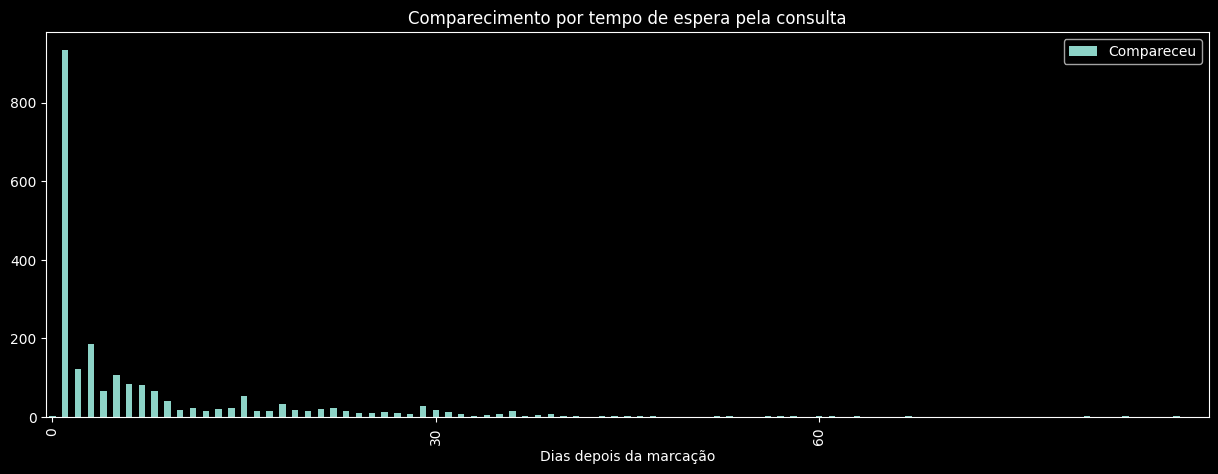

In [33]:
df_pcd.pivot_table(index='time_delta', aggfunc='count', values='Compareceu').plot(kind='bar', xticks= (np.arange(0,61,30)),figsize=(15,5), title = 'Comparecimento por tempo de espera pela consulta', xlabel = 'Dias depois da marcação')

#### Solução: Quanto mais cedo as consultas forem marcadas, e tendo sido reforçados os lembretes por sms, a taxa de AUSÊNCIA do grupo PCD diminuirá.

# Mateus 

In [34]:
df_3plus = df[df['time_delta'] > 3]
df_3plus.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,Regiao_Saude,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Renda,Faixa etaria
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13.0,CONQUISTA,0,0,0,0,0,1,0,SÃO PEDRO,Friday,Monday,4,355.045,Adolescentes
33,7.653517e+12,5616921,F,2016-04-25,2016-04-29,38.0,SÃO CRISTÓVÃO,1,0,0,0,0,1,1,MARUÍPE,Friday,Monday,4,773.955,Adultos
38,5.873316e+12,5609446,M,2016-04-20,2016-04-29,85.0,SÃO CRISTÓVÃO,0,1,0,0,0,1,1,MARUÍPE,Friday,Wednesday,9,773.955,Idosos
46,1.379437e+11,5615608,M,2016-04-25,2016-04-29,58.0,SÃO CRISTÓVÃO,0,1,0,1,0,1,1,MARUÍPE,Friday,Monday,4,773.955,Adultos
49,9.223559e+13,5534656,F,2016-03-31,2016-04-29,27.0,GRANDE VITÓRIA,0,0,0,0,0,1,0,SANTO ANTÔNIO,Friday,Thursday,29,467.870,Adultons Jovens


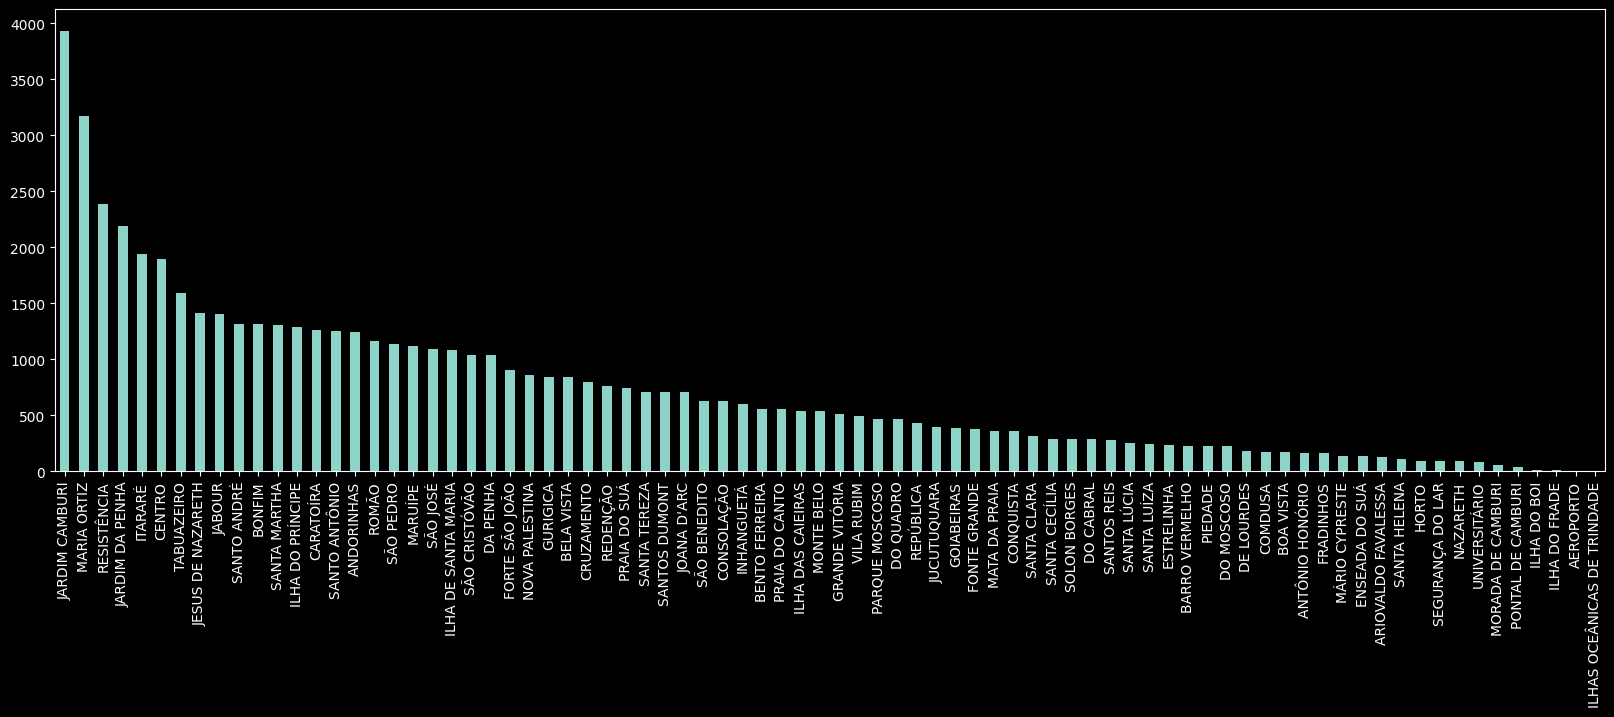

In [35]:
df_3plus['Neighbourhood'].value_counts().plot(kind='bar', figsize=(20, 6))
plt.show()

In [36]:
df_3plus['Compareceu'].value_counts()


1    40137
0    17167
Name: Compareceu, dtype: int64

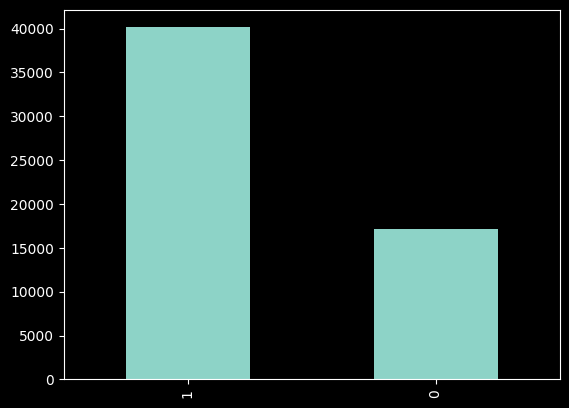

In [37]:
df_3plus['Compareceu'].value_counts().plot(kind='bar')
plt.show()


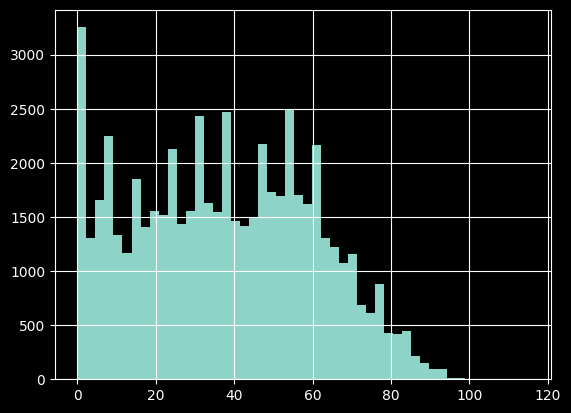

In [38]:
df_3plus['Age'].hist(bins=50)
plt.show()


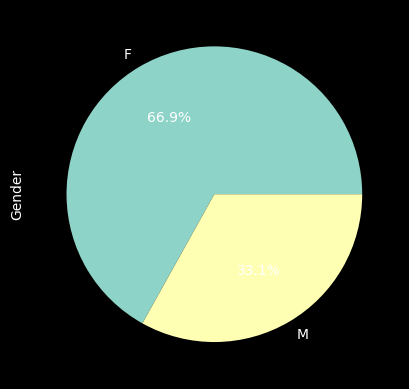

In [39]:
df_3plus['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


In [40]:
df_3plus.groupby('SMS_received')['Compareceu'].count().reset_index()

,SMS_received,Compareceu
0,0,22710
1,1,34594


In [41]:
df_3plus.groupby(['SMS_received','Compareceu'])['PatientId'].count().reset_index()

,SMS_received,Compareceu,PatientId
0,0,0,7572
1,0,1,15138
2,1,0,9595
3,1,1,24999


In [42]:
df_3plus.groupby('AppointmentDayOfWeek')['Compareceu'].mean().sort_values(ascending=False)

AppointmentDayOfWeek
Saturday     0.812500
Wednesday    0.714018
Tuesday      0.707086
Thursday     0.697173
Monday       0.692640
Friday       0.683090
Name: Compareceu, dtype: float64

In [43]:
df_3plus.groupby('ScheduledDayOfWeek')['Compareceu'].mean().sort_values(ascending=False)

ScheduledDayOfWeek
Saturday     1.000000
Friday       0.711622
Thursday     0.708451
Wednesday    0.702657
Tuesday      0.692581
Monday       0.685968
Name: Compareceu, dtype: float64

<Axes: >

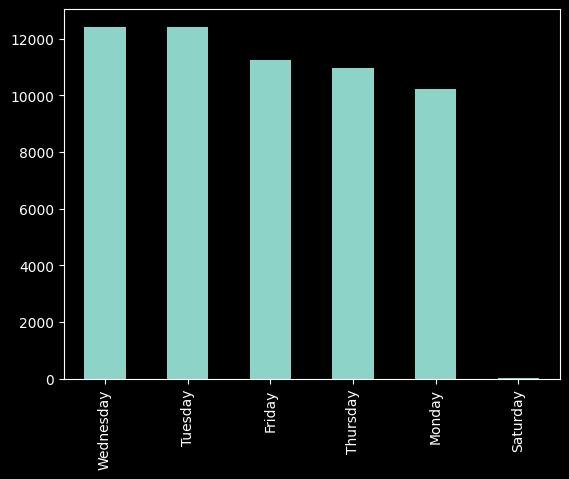

In [44]:
df_3plus['ScheduledDayOfWeek'].value_counts().plot(kind='bar')

<Axes: >

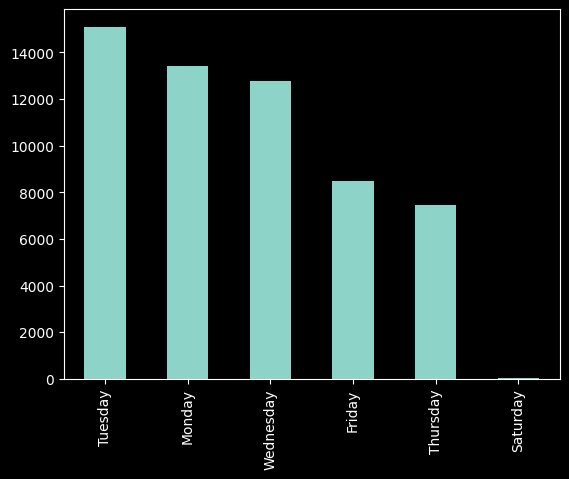

In [45]:
df_3plus['AppointmentDayOfWeek'].value_counts().plot(kind='bar')


In [46]:
sms_received_by_gender = df_3plus.groupby(['Gender', 'SMS_received'])['Compareceu'].mean().reset_index()

In [47]:
sms_received_by_gender

,Gender,SMS_received,Compareceu
0,F,0,0.670870
1,F,1,0.720329
2,M,0,0.658625
3,M,1,0.727595


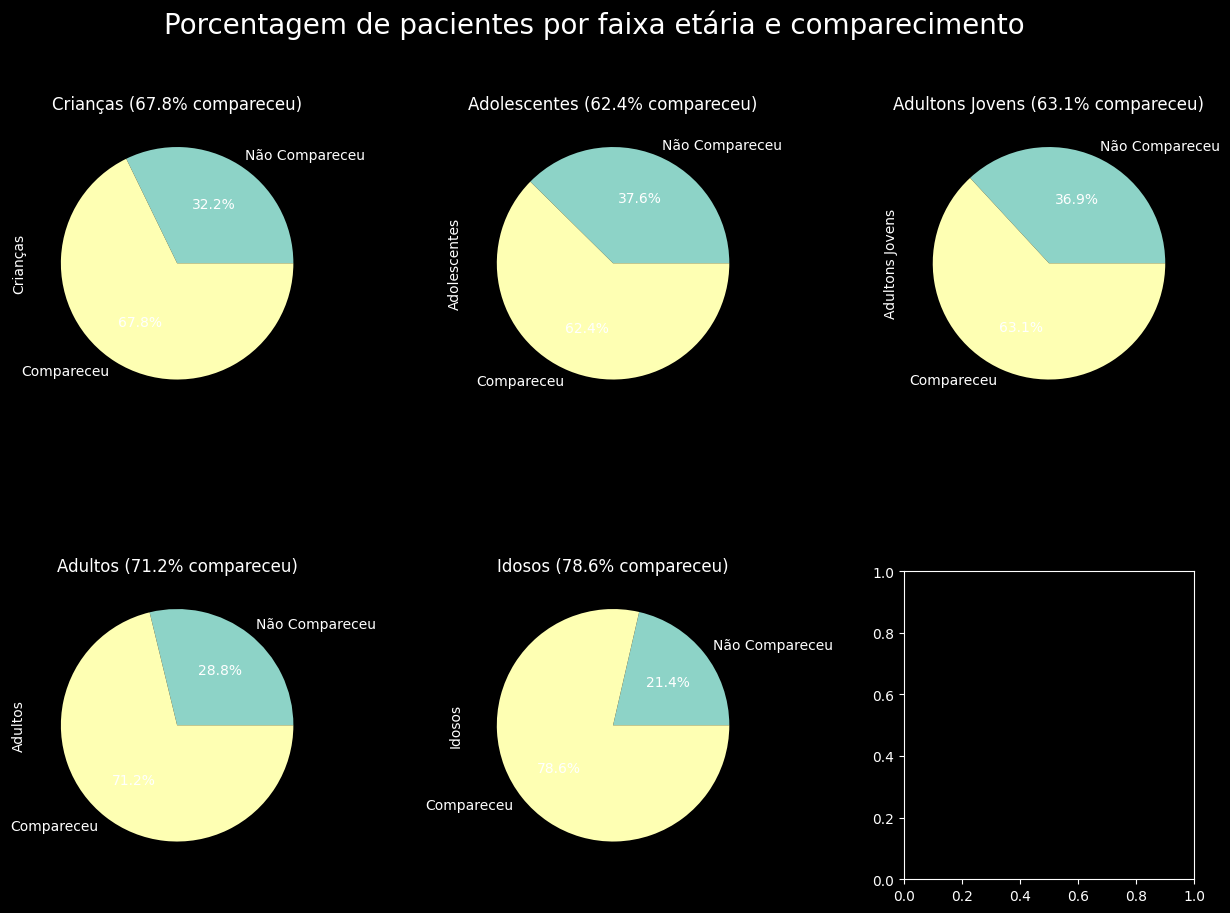

In [48]:
# Agrupar por faixa etária e comparecimento
age_by_show = df_3plus.groupby(['Faixa etaria', 'Compareceu'])['PatientId'].count().unstack()

# Criar subplot para cada faixa etária
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Título principal
fig.suptitle('Porcentagem de pacientes por faixa etária e comparecimento', fontsize=20)

# Loop pelas faixas etárias
for i, (index, data) in enumerate(age_by_show.iterrows()):
    # Calcular porcentagem de comparecimento
    total = data.sum()
    compareceu = data[1]
    porcentagem = compareceu / total * 100
    
    # Definir posição do subplot
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Plotar gráfico de pizza
    data.plot(kind='pie', 
              ax=ax, 
              autopct='%1.1f%%', 
              labels=['Não Compareceu', 'Compareceu'],
              title=f'{index} ({porcentagem:.1f}% compareceu)')
    
# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Exibir gráfico
plt.show()


<h1>Resultados do envio de SMS</h1>
<h3>Introdução</h3>
O envio de SMS para lembrar os pacientes de consultas médicas pode ser uma forma eficaz de melhorar a adesão ao tratamento e, consequentemente, a saúde do paciente. Nesta apresentação, iremos analisar os resultados da nossa campanha de envio de SMS para pacientes em Vitória-ES que têm consultas agendadas.

<h3>Dados</h3>
Os dados utilizados neste projeto foram obtidos a partir da base de dados 'Brazil's Medical Appointment - Show/No Show' disponível em https://www.kaggle.com/datasets/sarvaninandipati/brazils-medical-appointment-show-or-no-show. Nele existe a coluna de SMS e podemos relacionar com a coluna de comparecimento para analisar a eficácia dos sms.

<h3>Processos</h3>
Inicialmente, os dados mostravam que o SMS diminuia a taxa de comparecimento. Notamos que as consultas marcadas e realizadas no mesmo dia puxavam a taxa de comparecimento muito pra cima(aproximadamente 95% de comparecimento), e que as pessoas só começavam a receber SMS a partir de 3 dias de diferença da data da marcação para a realização da consulta. Então decidimos isolar esse caso pra fazer o estudo somente em pacientes que tenham um tempo de marcação e realização de consulta maior que 3 dias.


In [49]:
df_3plus = df[df['time_delta'] > 3]
df_3plus.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,Regiao_Saude,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Renda,Faixa etaria
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13.0,CONQUISTA,0,0,0,0,0,1,0,SÃO PEDRO,Friday,Monday,4,355.045,Adolescentes
33,7.653517e+12,5616921,F,2016-04-25,2016-04-29,38.0,SÃO CRISTÓVÃO,1,0,0,0,0,1,1,MARUÍPE,Friday,Monday,4,773.955,Adultos
38,5.873316e+12,5609446,M,2016-04-20,2016-04-29,85.0,SÃO CRISTÓVÃO,0,1,0,0,0,1,1,MARUÍPE,Friday,Wednesday,9,773.955,Idosos
46,1.379437e+11,5615608,M,2016-04-25,2016-04-29,58.0,SÃO CRISTÓVÃO,0,1,0,1,0,1,1,MARUÍPE,Friday,Monday,4,773.955,Adultos
49,9.223559e+13,5534656,F,2016-03-31,2016-04-29,27.0,GRANDE VITÓRIA,0,0,0,0,0,1,0,SANTO ANTÔNIO,Friday,Thursday,29,467.870,Adultons Jovens






<h3>Resultados</h3>
Os resultados mostram que a taxa de comparecimento dos pacientes que receberam o SMS foi 72,26%, enquanto a taxa de comparecimento dos pacientes que não receberam o SMS foi 66,65%.


In [50]:
df_3plus.groupby('SMS_received')['Compareceu'].mean().reset_index()

,SMS_received,Compareceu
0,0,0.666579
1,1,0.722640



Além disso, pudemos observar uma correlação entre o envio de SMS e a taxa de comparecimento dos pacientes. [Gráfico de barras ou outro tipo de gráfico que ilustre a correlação].


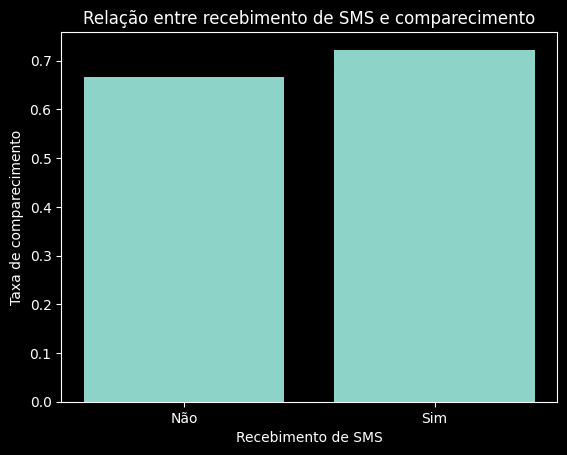

In [51]:
import matplotlib.pyplot as plt

sms_comparecimento = df_3plus.groupby('SMS_received')['Compareceu'].mean().reset_index()

plt.bar(sms_comparecimento['SMS_received'], sms_comparecimento['Compareceu'])
plt.xlabel('Recebimento de SMS')
plt.ylabel('Taxa de comparecimento')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.title('Relação entre recebimento de SMS e comparecimento')
plt.show()


A taxa de comparecimento aumenta em todas as faixas etárias, porém precisamos achar algo pra aliar ao sms e aumentar o comprometimento dos adolescentes e adultos jovens. E a taxa para crianças é a mais beneficiada pelo uso do SMS. Sendo assim, é necessário usar a estratégia para princilpamente Crianças, Adolescentes e Adultos jovens.

In [52]:
sms_by_age_show = df_3plus.groupby(['Faixa etaria', 'SMS_received'])['Compareceu'].mean().reset_index()
sms_by_age_show

,Faixa etaria,SMS_received,Compareceu
0,Crianças,0,0.632444
1,Crianças,1,0.711141
2,Adolescentes,0,0.598504
3,Adolescentes,1,0.642091
4,Adultons Jovens,0,0.609333
5,Adultons Jovens,1,0.644154
6,Adultos,0,0.673792
7,Adultos,1,0.735681
8,Idosos,0,0.757240
9,Idosos,1,0.806576


A taxa de comparecimento dos homens é mais afetada que a das mulheres com o uso do SMS, a porcentagem de homens que comparecem com o recebimento do SMS fica levemente maior que a das mulheres, note que os homens tem uma taxa de comparecimento menor no geral.

In [53]:
sms_received_by_gender = df_3plus.groupby(['Gender', 'SMS_received'])['Compareceu'].mean().reset_index()
sms_received_by_gender

,Gender,SMS_received,Compareceu
0,F,0,0.670870
1,F,1,0.720329
2,M,0,0.658625
3,M,1,0.727595


In [54]:
sms_received_by_gender = df_3plus.groupby(['Gender'])['Compareceu'].mean().reset_index()
sms_received_by_gender

,Gender,Compareceu
0,F,0.701301
1,M,0.698645





É importante ressaltar que, embora esses cálculos possam nos dar uma ideia geral da eficácia do SMS, há muitos outros fatores que podem influenciar a decisão de um paciente de comparecer a uma consulta, como a gravidade da condição médica, o acesso ao transporte, o nível socioeconômico, entre outros. Portanto, esses cálculos devem ser interpretados com cautela e considerando o contexto.

<h3>Conclusão</h3>
Com base nos resultados da nossa análise, podemos concluir que o envio de SMS é uma estratégia eficaz para melhorar a adesão dos pacientes a consultas médicas, sendo ainda mais recomendada para homens, adultos jovens, adolescentes e pais de crianças. Recomendamos que esta estratégia seja adotada por outras instituições médicas em todo o país para melhorar a saúde da população e reduzir os custos com tratamentos médicos desnecessários.

# Vinícius

# Avaliação da presença nos bairros

Primeiro, removemos as consultas que foram realizadas no mesmo dia, pois queremos ver a presença em consultas futuras.

In [55]:
not_emergency = df.query('time_delta > 0')

Após isso, separamos as consultas por bairros, e verificamos a média de comparecimento por bairro.

In [56]:
not_emergency.groupby(['Neighbourhood', 'Renda'])['Compareceu'].mean().sort_values(ascending=True)*100

Neighbourhood                Renda    
ILHAS OCEÂNICAS DE TRINDADE  0.0000        0.000000
GURIGICA                     474.5025     61.628959
JESUS DE NAZARETH            518.3450     62.507123
ITARARÉ                      660.7150     63.502730
HORTO                        1040.3000    64.035088
                                            ...    
MORADA DE CAMBURI            3047.3300    79.487179
DE LOURDES                   1631.0050    79.729730
AEROPORTO                    1631.0050    80.000000
SOLON BORGES                 966.5700     80.712166
ILHA DO BOI                  5446.0200    91.304348
Name: Compareceu, Length: 80, dtype: float64

É possível ver uma tendência de que bairros mais pobres tem uma taxa de ausência maior nas consultas.

Podemos colocar essa representação visualmente em gráficos:

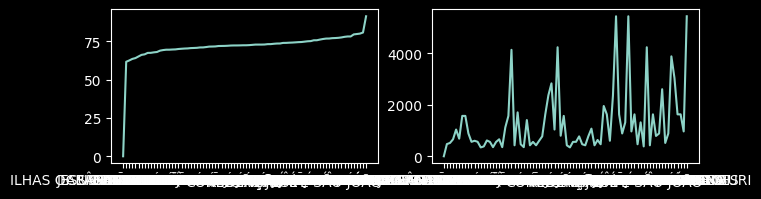

In [57]:
b_r_p = not_emergency.groupby(['Neighbourhood', 'Renda'])['Compareceu'].mean().sort_values(ascending=True)*100
x = [b[0] for b in b_r_p.index]
y = [b[1] for b in b_r_p.index]
plt.figure(figsize=(20,2))
plt.subplot(151)
plt.plot(x, b_r_p.values)
plt.subplot(152)
plt.plot(x, y, )
plt.show()

Fazendo a separação de acordo com as Regiões de Saúde, temos:

In [87]:
attendance = not_emergency.groupby('Regiao_Saude')['Compareceu'].mean().sort_values(ascending=True)
attendance

Regiao_Saude
MARUÍPE           0.692060
SÃO PEDRO         0.712205
FORTE SÃO JOÃO    0.713488
CENTRO            0.716993
SANTO ANTÔNIO     0.719387
CONTINENTAL       0.740986
Name: Compareceu, dtype: float64

In [88]:
income = not_emergency.groupby('Regiao_Saude')['Renda'].mean().sort_values(ascending=True)
income

Regiao_Saude
SÃO PEDRO          398.253148
SANTO ANTÔNIO      611.639567
MARUÍPE            817.223307
CENTRO             968.520566
FORTE SÃO JOÃO    1329.611683
CONTINENTAL       1678.083458
Name: Renda, dtype: float64

In [90]:
pd.merge(income, attendance, on='Regiao_Saude')

,Renda,Compareceu
Regiao_Saude,,
SÃO PEDRO,398.253148,0.712205
SANTO ANTÔNIO,611.639567,0.719387
MARUÍPE,817.223307,0.692060
CENTRO,968.520566,0.716993
FORTE SÃO JOÃO,1329.611683,0.713488
CONTINENTAL,1678.083458,0.740986


Conclusão: deve ser feito alguma ação sobre os bairros de menor renda, pois esses aparentam ser mais vulneráveis. Uma possibilidade seria um programa que os médicos vão até os pacientes desses bairros para minimizar as faltas nas consultas.

# Aline

# Data de agendamento:
O objetivo é avaliar a relação entra a data de agendamento e a assiduidade dos pacientes, visando criar um indicador para estabelecimento de um perfil propenso a não comparecer as consultas

In [59]:
df_aux = pd.read_excel('appointment_prediction_data.xlsx')
df_aux['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df_aux.rename(columns={'No-show': 'Compareceu'}, inplace=True)

In [60]:
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27T09:24:46Z,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1
110569,3.134163e+12,5768536,F,2016-06-03T07:42:27Z,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1
110570,6.846652e+12,5768917,M,2016-06-03T08:10:22Z,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1
110571,8.222960e+11,5772302,F,2016-06-03T15:06:15Z,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1


In [61]:
df_aux['ScheduledDay'] = pd.to_datetime(df_aux['ScheduledDay'])
df_aux['ScheduledDay_aux'] = pd.to_datetime(df_aux['ScheduledDay']).dt.date
df_aux['AppointmentDay_aux'] = pd.to_datetime(df_aux['AppointmentDay']).dt.date
df_aux['time_delta'] = (df_aux['AppointmentDay_aux'] - df_aux['ScheduledDay_aux']).dt.days
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,ScheduledDay_aux,AppointmentDay_aux,time_delta
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,2016-04-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27 09:24:46+00:00,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-04-27,2016-06-03,37
110569,3.134163e+12,5768536,F,2016-06-03 07:42:27+00:00,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0
110570,6.846652e+12,5768917,M,2016-06-03 08:10:22+00:00,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0
110571,8.222960e+11,5772302,F,2016-06-03 15:06:15+00:00,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-06-03,2016-06-07,4


In [62]:
#Extração da hora em que foi agendada a consulta
df_aux['ScheduledHour'] = df_aux.ScheduledDay.dt.strftime("%H")
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,ScheduledDay_aux,AppointmentDay_aux,time_delta,ScheduledHour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29,0,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,2016-04-29,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27 09:24:46+00:00,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-04-27,2016-06-03,37,09
110569,3.134163e+12,5768536,F,2016-06-03 07:42:27+00:00,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0,07
110570,6.846652e+12,5768917,M,2016-06-03 08:10:22+00:00,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0,08
110571,8.222960e+11,5772302,F,2016-06-03 15:06:15+00:00,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-06-03,2016-06-07,4,15


Com base no gráfico abaixo é possível notar que pessoas que agendaram suas consultas no perído da manhã foram as mais assíduas

<Axes: xlabel='ScheduledHour'>

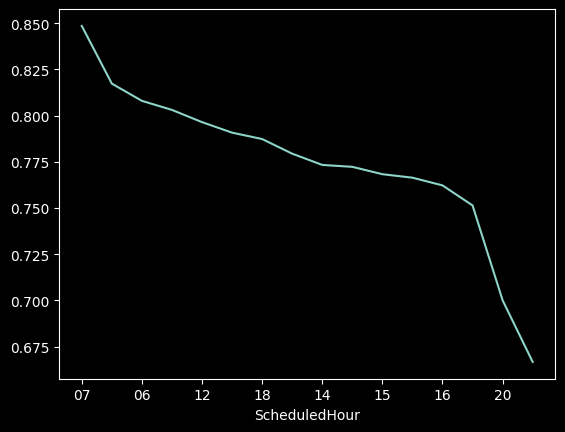

In [63]:
#Verificação da assiduidade por hora
df_aux.groupby('ScheduledHour')['Compareceu'].mean().sort_values(ascending=False).plot()

Com base no gráfico abaixo é possível notar que pessoas que agendaram suas consultas no sábado foram as mais assíduas

<Axes: xlabel='ScheduledWeekDay'>

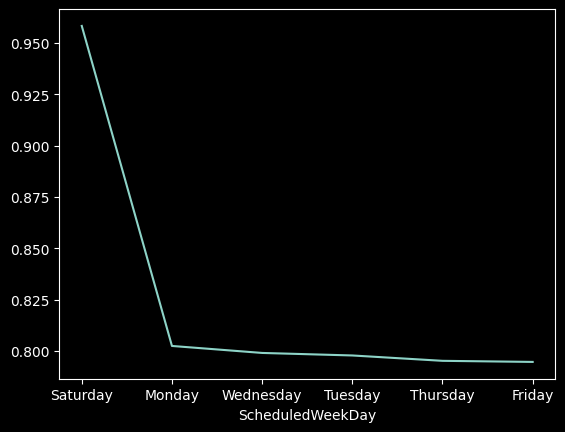

In [64]:
#Extração do dia da semana que foram realizadas os agendamentos
df_aux['ScheduledWeekDay'] = df_aux.ScheduledDay.dt.day_name()
df_aux.groupby('ScheduledWeekDay')['Compareceu'].mean().sort_values(ascending=False).plot()

Afim de validar se o comportamento se repete desocnsiderando possíveis casos de emergências (consultas agendadas e realizadas no mesmo dia), refizemos a análise eliminando esses casos e podemos notar que o mesmo se repete

In [65]:
df_filtrado = df_aux[df_aux.time_delta > 0].copy()

<Axes: xlabel='ScheduledHour'>

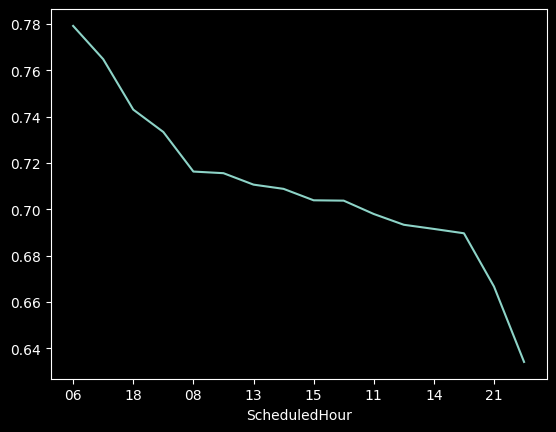

In [66]:
#Extração da hora em que foi agendada a consulta
df_filtrado['ScheduledHour'] = df_filtrado.ScheduledDay.dt.strftime("%H")
df_filtrado.groupby('ScheduledHour')['Compareceu'].mean().sort_values(ascending=False).plot()

<Axes: xlabel='ScheduledWeekDay'>

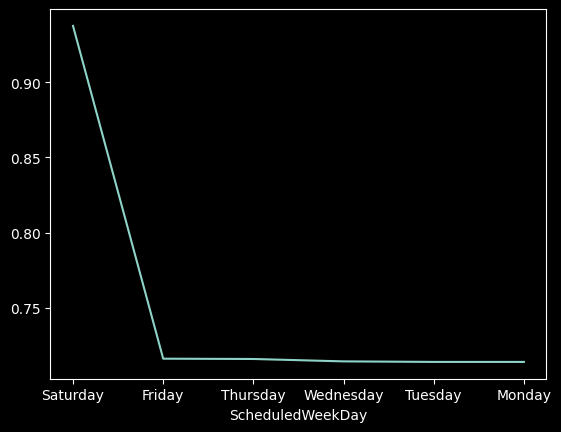

In [67]:
df_filtrado['ScheduledWeekDay'] = df_filtrado.ScheduledDay.dt.day_name()
df_filtrado.groupby('ScheduledWeekDay')['Compareceu'].mean().sort_values(ascending=False).plot()

# Felipe

# Análise do tempo entre a marcação da consulta e a consulta em si

- Felipe Cunha

### Hipóteses e pontos a serem investigados: 
- Uma parte das consultas foi marcada para o mesmo dia e a taxa de comparecimento deve ser mais alta;
- Quanto maior a diferença de tempo entre a marcação da consulta e a consulta, maior a taxa de ausentes;
- Quanto maior a diferença de tempo, mais as pessoas recebem SMS para lembrar da consulta;
    - E nesse caso, o recebimento de SMS faz com que aumente a taxa de presença?
- Verificar também as outras variáveis em relação a faixas de intervalo de tempo

### Análise das consultas marcadas para o mesmo dia

In [68]:
# Verificando quantas consultas foram marcadas para o mesmo dia e criando um dataframe com essas consultas
consultas_mesmo_dia = df['time_delta'].value_counts()[0]
total_consultas = len(df['time_delta'])

df_dia0 = df[df['time_delta'] == 0]
df_dia0['Compareceu'].value_counts()

print(f'Total de consultas marcadas para o mesmo dia: {consultas_mesmo_dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):')
print(df_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_dia0.shape[0]}, Colunas: {df_dia0.shape[1]}')

Total de consultas marcadas para o mesmo dia: 38587.
Total de consultas: 110573.

Relação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):
1    36795
0     1792
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 38587, Colunas: 20


In [69]:
presenca_dia0 = df_dia0['Compareceu'].value_counts()[1] # Relação de pessoas que foram a consulta
ausencia_dia0 = df_dia0['Compareceu'].value_counts()[0] # Relação de pessoas que não foram a consulta

print(f'Percentual de consultas marcadas para o mesmo dia: {consultas_mesmo_dia/total_consultas*100:.2f}%.')
print(f'Percentual de presença nessas consultas: {presenca_dia0/len(df_dia0)*100:.2f}%.')

Percentual de consultas marcadas para o mesmo dia: 34.90%.
Percentual de presença nessas consultas: 95.36%.


In [70]:
df_dia0.groupby('Compareceu').mean() # Panorama geral dos dados para as consultas marcadas no mesmo dia

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta,Renda
Compareceu,,,,,,,,,,,
0,1.482995e+14,5.709346e+06,28.405587,0.136719,0.131696,0.049107,0.031250,0.039621,0.0,0.0,927.402907
1,1.518766e+14,5.713338e+06,34.749061,0.107216,0.177660,0.067400,0.040277,0.023427,0.0,0.0,957.258556


##### Conclusões
- Concluí-se que nesse tipo de consulta a taxa de comparecimento é bem alta (> 95%);
- A média de idade para quem compareceu é de 35 anos, um pouco maior que a das pessoas que não compareceram (28 anos);
- Fatores como receber ou não o bolsa família, doenças pré-existentes não parecem influenciar na presença ou ausência nas consultas;

### Análise do restante dos dados, consultas com 1 ou mais dias de intervalo entre a marcação e a consulta

In [71]:
df_sem_dia0 = df[df['time_delta'] > 0] # criando o dataframe
df_sem_dia0.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,Regiao_Saude,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Renda,Faixa etaria
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,1,CONTINENTAL,Friday,Wednesday,2,1631.0050,Idosos
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,0,CONTINENTAL,Friday,Wednesday,2,791.3625,Adultons Jovens
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,0,CONTINENTAL,Friday,Wednesday,2,791.3625,Adultos
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.0,CONQUISTA,0,0,0,0,0,0,1,SÃO PEDRO,Friday,Wednesday,2,355.0450,Adultons Jovens
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,NaN,NOVA PALESTINA,0,0,0,0,0,0,1,SÃO PEDRO,Friday,Wednesday,2,355.0450,NaN


In [72]:
# Verificando quantas consultas foram marcadas com mais de um dia de intervalo e criando um dataframe com essas consultas
consultas_mais_1dia = len(df_sem_dia0)

print(f'Total de consultas marcadas com um ou mais de um dia de intervalo: {consultas_mais_1dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):')
print(df_sem_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')

Total de consultas marcadas com um ou mais de um dia de intervalo: 71981.
Total de consultas: 110573.

Relação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):
1    51454
0    20527
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 71981, Colunas: 20


In [73]:
presenca_sem_dia0 = df_sem_dia0['Compareceu'].value_counts()[1] # Relação de pessoas que foram a consulta

print(f'Percentual de consultas marcadas para um intervalo de tempo maior que um dia: {consultas_mais_1dia/total_consultas*100:.2f}%.')
print(f'Percentual de presença nessas consultas: {presenca_sem_dia0/len(df_sem_dia0)*100:.2f}%.')

Percentual de consultas marcadas para um intervalo de tempo maior que um dia: 65.10%.
Percentual de presença nessas consultas: 71.48%.


##### Percebe-se uma queda em mais de 20% para consultas agendadas para dias posteriores. 
---
##### Em seguida foi verificado o comportamento da variável relativa ao intervalo de tempo

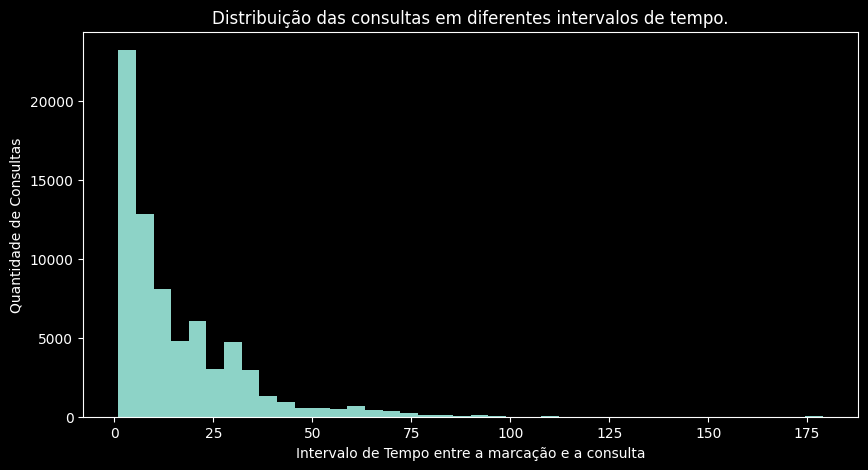

In [74]:
plt.figure(figsize=(10,5))
plt.hist(df_sem_dia0['time_delta'], bins=40) # histograma para ver a distribuição dos dados
plt.xlabel('Intervalo de Tempo entre a marcação e a consulta')
plt.ylabel('Quantidade de Consultas')
plt.title('Distribuição das consultas em diferentes intervalos de tempo.')
plt.show()

- A partir do histograma, percebeu-se que a maioria das consultas estava concentrada em um intervalo de tempo de até 40 dias. 
- Em seguida foi verificado se haviam outliers para essa série de dados

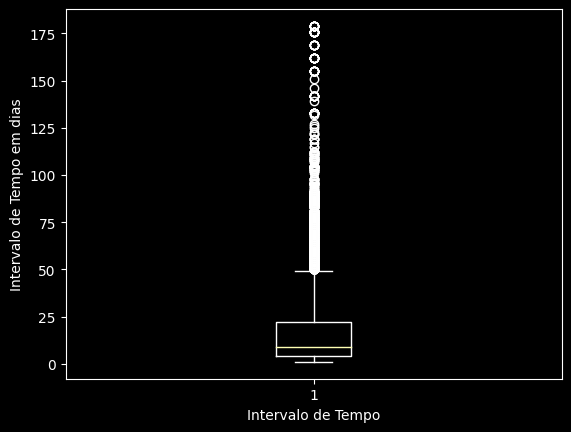

In [75]:
plt.boxplot(df_sem_dia0['time_delta']) # boxplot para verificar a presença de outliers
plt.xlabel('Intervalo de Tempo')
plt.ylabel('Intervalo de Tempo em dias')
plt.show()

In [76]:
q_high = df_sem_dia0['time_delta'].quantile(0.95) # Cálculo do limite máximo para retirada dos outliers em 95% de confiança
q_high

48.0

- Optou-se por retirar as consultas marcadas no mesmo dia e as com mais de 48 dias de intervalo para se fazer um estudo

In [77]:
df_filtrado = df_sem_dia0[df_sem_dia0['time_delta'] < q_high] # criação do novo dataframe filtrado, sem outliers
df_filtrado.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,Regiao_Saude,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Renda,Faixa etaria
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,1,CONTINENTAL,Friday,Wednesday,2,1631.0050,Idosos
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,0,CONTINENTAL,Friday,Wednesday,2,791.3625,Adultons Jovens
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,0,CONTINENTAL,Friday,Wednesday,2,791.3625,Adultos
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.0,CONQUISTA,0,0,0,0,0,0,1,SÃO PEDRO,Friday,Wednesday,2,355.0450,Adultons Jovens
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,NaN,NOVA PALESTINA,0,0,0,0,0,0,1,SÃO PEDRO,Friday,Wednesday,2,355.0450,NaN


In [78]:
print(f'Formato do DF com outliers: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')
print(f'Formato do DF sem outliers: Linhas: {df_filtrado.shape[0]}, Colunas: {df_filtrado.shape[1]}')
print(f'Foram retiradas {df_sem_dia0.shape[0] - df_filtrado.shape[0]} consultas.')

Formato do DF com outliers: Linhas: 71981, Colunas: 20
Formato do DF sem outliers: Linhas: 68336, Colunas: 20
Foram retiradas 3645 consultas.


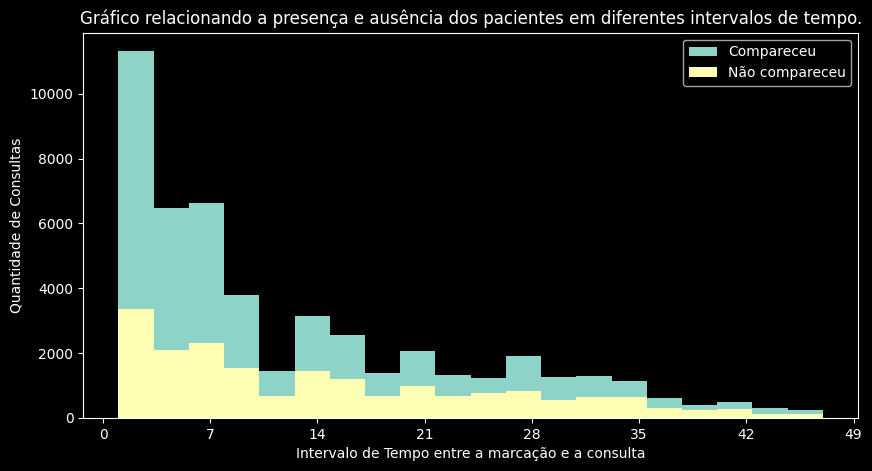

In [79]:
# cálculo do total de pessoas que compareceram e das que não compareceram 
compareceu = df_filtrado[df_filtrado['Compareceu'] == 1]['time_delta']
n_compareceu = df_filtrado[df_filtrado['Compareceu'] == 0]['time_delta']

plt.figure(figsize=(10,5))
plt.hist(compareceu, bins=20, label='Compareceu')
plt.hist(n_compareceu, bins=20, label='Não compareceu')
plt.xlabel('Intervalo de Tempo entre a marcação e a consulta')
plt.ylabel('Quantidade de Consultas')
plt.title('Gráfico relacionando a presença e ausência dos pacientes em diferentes intervalos de tempo.')
plt.xticks(np.arange(0, 50, 7))
plt.legend()
plt.show()

- Percebe-se que a partir de um intervalo de tempo ~14 dias, ocorre uma maior taxa de ausentes às consultas. 

In [80]:
df_filtrado.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta,Renda
Compareceu,,,,,,,,,,,
0,1.464297e+14,5.657383e+06,34.565022,0.116323,0.170958,0.065448,0.031359,0.016323,0.471061,14.472091,955.038644
1,1.444385e+14,5.668006e+06,39.561605,0.086781,0.224569,0.079013,0.024000,0.019033,0.491291,12.362601,1022.131119


In [81]:
df_mais14 = df_filtrado[df_filtrado['time_delta'] >= 14] # consultas só com mais de 14 dias
df_mais14.groupby('Compareceu').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta,Renda
Compareceu,,,,,,,,,,,
0,1.499885e+14,5.621023e+06,32.338396,0.115346,0.139067,0.048342,0.026757,0.013153,0.551209,24.955818,978.571430
1,1.447641e+14,5.626526e+06,36.855533,0.087681,0.184681,0.057296,0.020735,0.015220,0.629205,24.685563,1101.505916


- Nesses conjuntos analisados, percebe-se que a média de idades dos faltantes é menor do que a de pessoas que compareceram às consultas (em torno de 10% menores).
---
- Por fim, analisou-se apenas os "outliers", ou seja, consultas com mais de 48 dias entre a marcação e a consulta em si

In [82]:
df_filtrado_2 = df_sem_dia0[df_sem_dia0['time_delta'] >= q_high] # criação do novo dataframe filtrado só dos outliers
df_filtrado_2.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,Regiao_Saude,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Renda,Faixa etaria
285,6.342844e+10,5430959,F,2016-03-04,2016-04-29,20.0,SANTA MARTHA,0,0,0,0,0,0,1,MARUÍPE,Friday,Friday,56,603.6125,Adultons Jovens
475,9.639166e+11,5452612,M,2016-03-10,2016-04-29,20.0,SÃO PEDRO,0,0,0,0,0,1,0,SÃO PEDRO,Friday,Thursday,50,426.9500,Adultons Jovens
476,4.414826e+13,5408325,F,2016-02-29,2016-04-29,32.0,NOVA PALESTINA,0,0,0,0,0,1,0,SÃO PEDRO,Friday,Monday,60,355.0450,Adultos
696,6.441189e+14,5441632,F,2016-03-08,2016-04-29,69.0,JESUS DE NAZARETH,0,1,1,0,0,0,1,FORTE SÃO JOÃO,Friday,Tuesday,52,518.3450,Idosos
698,3.174757e+13,5435044,F,2016-03-07,2016-04-29,38.0,JESUS DE NAZARETH,0,0,0,1,0,1,0,FORTE SÃO JOÃO,Friday,Monday,53,518.3450,Adultos


In [83]:
print(f'Formato do DF com outliers: Linhas: {df_filtrado_2.shape[0]}, Colunas: {df_filtrado_2.shape[1]}')

Formato do DF com outliers: Linhas: 3645, Colunas: 20


In [84]:
df_filtrado_2.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta,Renda
Compareceu,,,,,,,,,,,
0,1.497573e+14,5.470031e+06,39.645890,0.066847,0.196929,0.064137,0.010840,0.015357,0.578139,65.416441,1329.696493
1,1.505914e+14,5.468331e+06,47.808511,0.036643,0.202916,0.067376,0.010638,0.016548,0.661939,66.139086,1397.757051


In [85]:
f2_comparecimento = len(df_filtrado_2[df_filtrado_2['Compareceu'] == 1])

print(f'Percebe-se uma taxa de comparecimento nessas consultas de: {(f2_comparecimento/len(df_filtrado_2)*100):.2f}%.')

Percebe-se uma taxa de comparecimento nessas consultas de: 69.63%.


- Por fim, concluí-se que: 
    - As pessoas vão mais às consultas marcadas para o mesmo dia (~95%);
    - Essa taxa possui uma **tendência de queda** com o __aumento do intervalo de tempo__ entre a marcação e a consulta;
    - Para consultas com mais de **14 dias**, há uma **contribuição maior** do recebimento de SMS como alerta;
    - Em geral, a média de idade das pessoas que comparecem às consultas é maior;
    - Há uma tendência de usuários do bolsa família faltarem mais às consultas; 
    - Fatores como deficiência não parecem influenciar no comparecimento ou não às consultas.